In [14]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [23]:
xnp,ynp = datasets.make_regression(n_samples=100,n_features=1,noise = 20,random_state=1)
X = torch.from_numpy(xnp.astype(np.float32))
y = torch.from_numpy(ynp.astype(np.float32))

In [24]:
y = y.view(y.shape[0],1)

In [25]:
n_samples,n_features = X.shape

In [26]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)

epoch:10,loss=497.7566
epoch:20,loss=453.0945
epoch:30,loss=420.5425
epoch:40,loss=396.8055
epoch:50,loss=379.4886
epoch:60,loss=366.8502
epoch:70,loss=357.6230
epoch:80,loss=350.8837
epoch:90,loss=345.9603
epoch:100,loss=342.3623


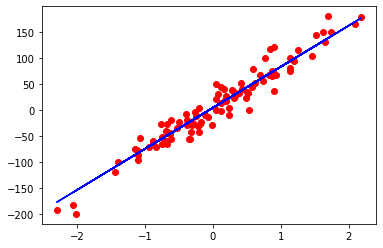

In [28]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
  y_predicted = model(X)
  loss = criterion(y_predicted,y)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1)%10==0:
    print(f"epoch:{epoch+1},loss={loss.item():.4f}")

predicted = model(X).detach().numpy()
plt.plot(xnp,ynp,'ro')
plt.plot(xnp,predicted,'b')
plt.show()